In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('decision_dataset.csv')

In [27]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:, -1]

In [29]:
y.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Play, dtype: object

In [30]:
X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in X.columns:
    X.loc[:, i] = label_encoder.fit_transform(X[i])
    

In [32]:
X.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [33]:
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier

treemodel=DecisionTreeClassifier(max_depth=6, criterion='entropy')

In [36]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.7, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 

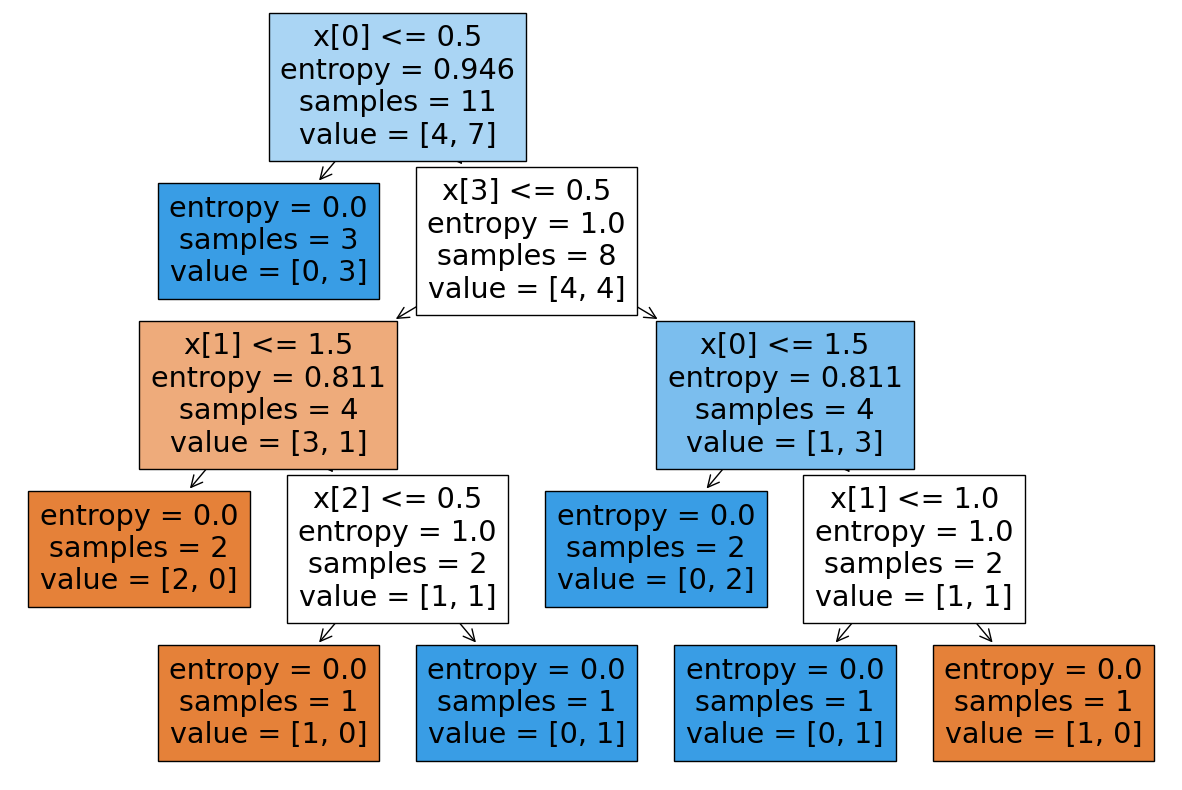

In [37]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [38]:
y_pred = treemodel.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [41]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,9,10],
  'max_features':['auto', 'sqrt', 'log2', 2, 3 ,4 , 5,6,7,8,9]
    
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [44]:
cv.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 3300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4, 5, 6,
                                          7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [45]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [46]:
y_pred=cv.predict(X_test)

In [47]:
accuracy_score(y_pred,y_test)

1.0